# Multiprocessing ARFI template from Makita

This notebook computes the metrics and creates the plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./resultsData/experiment_results.csv")

Table of contents of dataframe:
* `K8s_test1` - Initial Kubernetes runs with default RAM limits of 2GB for all worker nodes  
* `benchmark` - Computational time without multiprocessing   
* `K8s_test2` - Kubernetes runs with 1024 megabites per Worker  
* `K8s_test3` - Kubernetes runs with 2048 megabites per Worker 
* `bare_metal` - GNU runs

### Metrics computation 

In [3]:
# compute speedup ratios
default_timing = df.benchmark.iloc[0]
df['speedup_test1'] = default_timing/df.K8s_test1
df['speedup_test1'] = default_timing/df.K8s_test2
df['speedup_test3'] = default_timing/df.K8s_test3
df['speedup_metal'] = default_timing/df.bare_metal

In [4]:
# compute efficiency 
df['efficiecy_test1'] = df.speedup_test1/df.number_cores
df['efficiecy_test2'] = df.speedup_test2/df.number_cores
df['efficiecy_test3'] = df.speedup_test3/df.number_cores
df['efficiecy_metal'] = df.speedup_metal/df.number_cores

### Plot the fiqures

In [5]:
Colours = {"Gray": "#8b8c89",
           "DarkBlue": "#274c77",
           "LightBlue": "#a3cef1",
           "Blue": "#6096ba",
           "Red":"#c91025"
           }

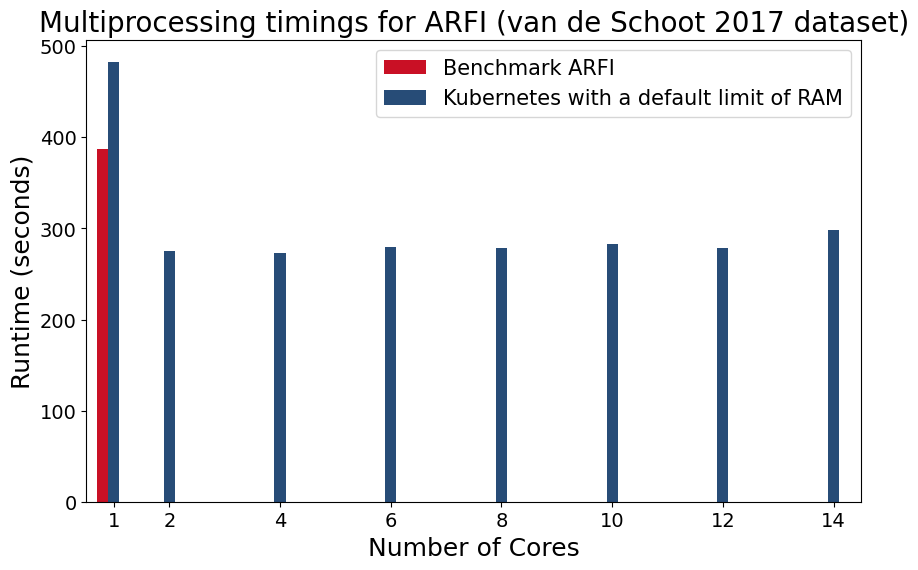

In [6]:
# Increase font size
plt.rcParams.update({'font.size': 14})  # Adjust the font size as desired

# Number of cores and corresponding metric values
cores = np.array(df.number_cores.iloc[:-1])
metric1_values = df['bare_metal']  
metric2_values = df['K8s_test3']  
metric3_values = df['benchmark'].iloc[:-1]  
metric4_values = df['K8s_test2']  
metric5_values = df['K8s_test1'].iloc[:-1]  

# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as desired

# Width of each bar
width = 0.2  # Adjust the width as desired

# Calculate the x-axis positions for each bar
positions1 = cores - 2*width
positions2 = cores - width
positions3 = cores
positions4 = cores + width
positions5 = cores + 2*width


ax.bar(positions2, metric3_values, width, color=Colours['Red'], label='Benchmark ARFI')
ax.bar(positions3, metric5_values, width, color=Colours['DarkBlue'], label='Kubernetes with a default limit of RAM')


# Set labels and title
ax.set_xlabel('Number of Cores', fontsize=18)
ax.set_ylabel('Runtime (seconds)', fontsize=18)
ax.set_title('Multiprocessing timings for ARFI (van de Schoot 2017 dataset)', fontsize=20)  # Adjust the font size as desired

# Set x-axis ticks and labels
ax.set_xticks(cores)
ax.set_xticklabels(cores)

# Add more spacing between the x-axis ticks
ax.set_xlim(0.5, cores[-1] + 0.5)

# Move the legend to the upper right corner and set the font size
legend = ax.legend(loc='upper right', prop={'size': 15})  # Adjust the location and font size as desired

# Display the chart
plt.show()

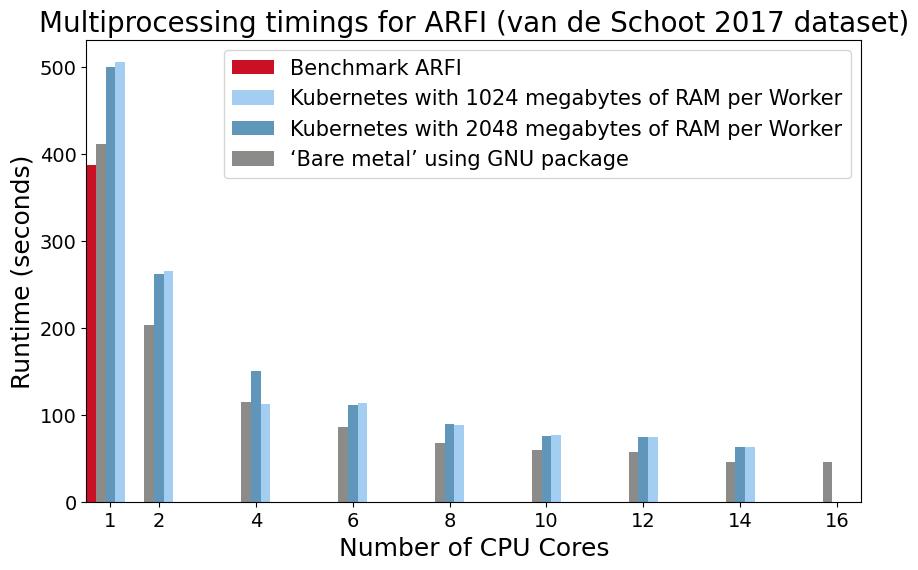

In [7]:
# Taking memory into into shape
cores = np.array(df.number_cores)
metric3_values = df['benchmark']
metric5_values = df['K8s_test1']

# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as desired

# Width of each bar
width = 0.2  # Adjust the width as desired

# Calculate the x-axis positions for each bar
positions1 = cores - 2* width
positions2 = cores - width
positions3 = cores
positions4 = cores + width
positions5 = cores + 2*width
# Create the bar chart for column 1 (light grey bars)

ax.bar(positions1, metric3_values, width, color=Colours['Red'], label='Benchmark ARFI')
ax.bar(positions2, metric1_values, width, color=Colours['Gray'], label='‘Bare metal’ using GNU package')
ax.bar(positions3, metric2_values, width, color=Colours['Blue'], label='Kubernetes with 2048 megabytes of RAM per Worker')
ax.bar(positions4, metric4_values, width, color=Colours['LightBlue'], label='Kubernetes with 1024 megabytes of RAM per Worker')


# Set labels and title
ax.set_xlabel('Number of CPU Cores', fontsize=18)
ax.set_ylabel('Runtime (seconds)', fontsize=18)
ax.set_title('Multiprocessing timings for ARFI (van de Schoot 2017 dataset)', fontsize=20)  # Adjust the font size as desired

# Set x-axis ticks and labels
ax.set_xticks(cores)
ax.set_xticklabels(cores)

# Add more spacing between the x-axis ticks
ax.set_xlim(0.5, cores[-1] + 0.5)

# Move the legend to the upper right corner and set the font size
legend = ax.legend(loc='upper right', prop={'size': 15})  # Adjust the location and font size as desired

# Reorder the legend handles and labels
handles, labels = ax.get_legend_handles_labels()
reordered_indices = [0, 3, 2, 1]  # Define the desired order of the legend items
reordered_handles = [handles[i] for i in reordered_indices]
reordered_labels = [labels[i] for i in reordered_indices]
legend = ax.legend(reordered_handles, reordered_labels, loc='upper right', prop={'size': 15})

# Display the chart
plt.show()


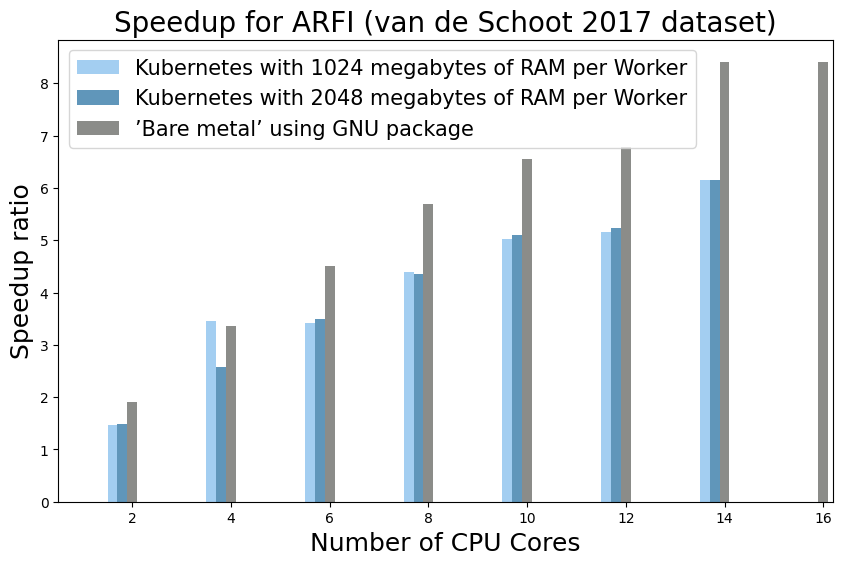

In [8]:
# Increase font size
plt.rcParams.update({'font.size': 10})  # Adjust the font size as desired

cores = np.array(df.number_cores.iloc[1:]) 
metric1_values = df['speedup_test2'].iloc[1:]  # Values for column 1
metric2_values = df['speedup_test3'].iloc[1:]  # Values for column 2
metric3_values = df['speedup_metal'].iloc[1:]  # Values for column 3


# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as desired

# Width of each bar
width = 0.2  # Adjust the width as desired

# Calculate the x-axis positions for each bar
positions1 = cores - 2*width
positions2 = cores - width
positions3 = cores


# Create the bar chart for column 2 (light blue bars)
ax.bar(positions1, metric1_values, width, color=Colours['LightBlue'], label='Kubernetes with 1024 megabytes of RAM per Worker')
ax.bar(positions2, metric2_values, width, color=Colours['Blue'], label='Kubernetes with 2048 megabytes of RAM per Worker')
ax.bar(positions3, metric3_values, width, color=Colours['Gray'], label='’Bare metal’ using GNU package')


# Set labels and title
ax.set_xlabel('Number of CPU Cores', fontsize=18)
ax.set_ylabel('Speedup ratio', fontsize=18)
ax.set_title('Speedup for ARFI (van de Schoot 2017 dataset)', fontsize=20)  # Adjust the font size as desired

# Set x-axis ticks and labels
ax.set_xticks(cores)
ax.set_xticklabels(cores)

# Add more spacing between the x-axis ticks
ax.set_xlim(0.5, cores[-1] + 0.2)

# Move the legend to the upper right corner and set the font size
legend = ax.legend(loc='upper left', prop={'size': 15})  # Adjust the location and font size as desired

# Reorder the legend handles and labels
handles, labels = ax.get_legend_handles_labels()
reordered_indices = [0, 1, 2]  # Define the desired order of the legend items
reordered_handles = [handles[i] for i in reordered_indices]
reordered_labels = [labels[i] for i in reordered_indices]
legend = ax.legend(reordered_handles, reordered_labels, loc='upper left', prop={'size': 15})

# Display the chart
plt.show()


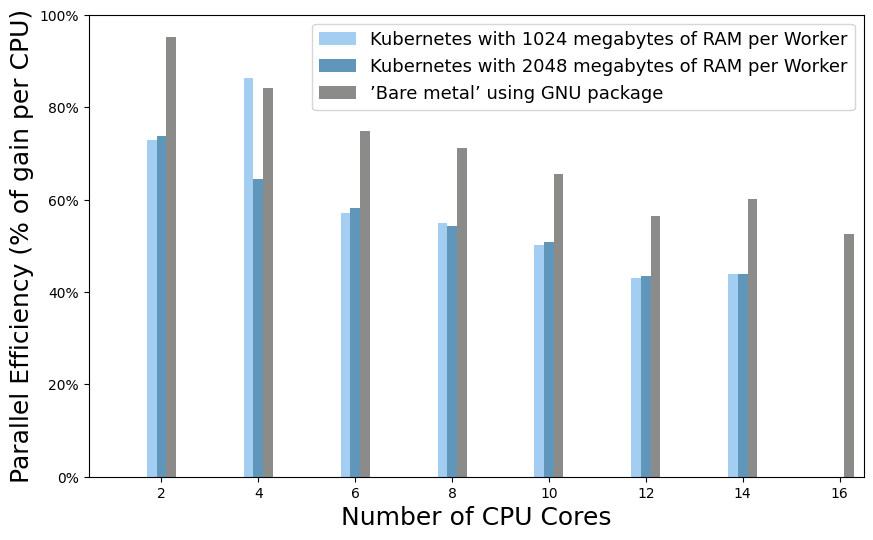

In [12]:
import matplotlib.ticker as mticker

# Increase font size
plt.rcParams.update({'font.size': 10})  # Adjust the font size as desired

cores = np.array(df.number_cores.iloc[1:])
metric1_values = df['efficiecy_test2'].iloc[1:] * 100  # Values for column 1 (converted to percentages)
metric2_values = df['efficiecy_test3'].iloc[1:] * 100  # Values for column 2 (converted to percentages)
metric3_values = df['efficiecy_metal'].iloc[1:] * 100  # Values for column 3 (converted to percentages)

# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as desired

# Width of each bar
width = 0.2  # Adjust the width as desired

# Calculate the x-axis positions for each bar
positions1 = cores - width
positions2 = cores
positions3 = cores + width

# Create the bar chart for column 2 (light blue bars)
ax.bar(positions1, metric1_values, width, color=Colours['LightBlue'], label='Kubernetes with 1024 megabytes of RAM per Worker')
ax.bar(positions2, metric2_values, width, color=Colours['Blue'], label='Kubernetes with 2048 megabytes of RAM per Worker')
ax.bar(positions3, metric3_values, width, color=Colours['Gray'], label='’Bare metal’ using GNU package')

# Set labels and title
ax.set_xlabel('Number of CPU Cores', fontsize=18)
ax.set_ylabel('Parallel Efficiency (% of gain per CPU)', fontsize=18)  # Updated y-axis label
ax.set_title('Efficiency for ARFI (van de Schoot 2017 dataset)', fontsize=20)  # Adjust the font size as desired

# Set x-axis ticks and labels
ax.set_xticks(cores)
ax.set_xticklabels(cores)

# Add more spacing between the x-axis ticks
ax.set_xlim(0.5, cores[-1] + 0.5)

# Move the legend to the upper right corner and set the font size
legend = ax.legend(loc='upper right', prop={'size': 13})  # Adjust the location and font size as desired

# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Display the chart
plt.show()
